In [1]:
import pandas as pd
import os


csv = pd.read_csv(f'temp_data/{os.listdir("temp_data")[0]}')

In [2]:
csv.head()

,Account Number,Transaction Date,Transaction Amount,Transaction Type,Transaction Description,Balance
0,8346,03/28/23,-10.26,Debit,Withdrawal from PAYPAL to ANDREW YEN INST XFER,3072.18
1,8346,03/28/23,-4.35,Debit,Digital Card Purchase - PAYPAL SHIPSTATION ST ...,3082.44
2,8346,03/27/23,-315.74,Debit,Withdrawal from PAYPAL to ANDREW YEN INST XFER,3086.79
3,8346,03/27/23,-13.00,Debit,Withdrawal from PAYPAL to ANDREW YEN INST XFER,3402.53
4,8346,03/27/23,-2.90,Debit,Withdrawal from PAYPAL to ANDREW YEN INST XFER,3415.53


In [3]:
# add month column
csv['month'] = csv['Transaction Date'].str[:2]

# clean "Transaction Date" for easier use
csv['Transaction_Date'] = pd.to_datetime(csv['Transaction Date'])



In [4]:
# # add month column
# csv['month'] = csv['Transaction Date'].str[:2]

# import numpy as np
# # add pending transactions manually
# pending = [
#     {
#         'Account Number':8346,
#         'Transaction Date': '03/01/23',
#         'Transaction Amount': -100.,
#         'Transaction Type': 'Debit',
#         'Transaction Description': '48 Hour books',
#         'Balance': np.nan,
#         'month':'03'
#     },
#     {
#         'Account Number':8346,
#         'Transaction Date': '03/01/23',
#         'Transaction Amount': -114.48,
#         'Transaction Type': 'Debit',
#         'Transaction Description': 'Printing Supplies',
#         'Balance': np.nan,
#         'month':'03'
#     },
#     {
#         'Account Number':8346,
#         'Transaction Date': '03/01/23',
#         'Transaction Amount': -1210.84,
#         'Transaction Type': 'Debit',
#         'Transaction Description': '48 Hour books reprint',
#         'Balance': np.nan,
#         'month':'03'
#     },
#     {
#         'Account Number':8346,
#         'Transaction Date': '03/01/23',
#         'Transaction Amount': 1414.38,
#         'Transaction Type': 'Credit',
#         'Transaction Description': 'Sales',
#         'Balance': np.nan,
#         'month':'03'
#     }
    
# ]

# csv_cmplt = pd.concat([csv,pd.DataFrame(data=pending)]).reset_index(drop=True)

In [5]:
# total expenses year-to-date
csv[csv['Transaction Type']=='Debit']['Transaction Amount'].sum()

-5322.08

In [6]:
# total revenue year-to-date
csv[csv['Transaction Type']=='Credit']['Transaction Amount'].sum()

7037.63

In [8]:
# set up dates
from datetime import date, timedelta

end_date = date.today()

start_date = end_date-timedelta(days=30)

end_date = pd.to_datetime(end_date)
start_date = pd.to_datetime(start_date)

last_30_days = csv.loc[(csv['Transaction_Date'] >= start_date) & (csv['Transaction_Date'] <= end_date)]

In [10]:
# expenses last 30 days
last_30_days[last_30_days['Transaction Type']=='Debit']['Transaction Amount'].sum()

-2954.149999999999

In [11]:
# revenue last 30 days
last_30_days[last_30_days['Transaction Type']=='Credit']['Transaction Amount'].sum()

3453.78

In [20]:
# shipping expenses year-to-date
debits = csv[csv['Transaction Type']=='Debit']

debits['Transaction Description'].value_counts()

shipping_debits = debits[(debits['Transaction Description'].str.contains("Withdrawal from PAYPAL to")) \
    | (debits['Transaction Description'].str.contains('SHIPSTATION'))]['Transaction Amount'].sum()

shipping_debits

-2003.6800000000007

In [21]:
# other expenses year-to-date
total_debits = debits['Transaction Amount'].sum()

total_debits - shipping_debits

-3318.399999999999

In [98]:
# Profit year-to-date
credits = csv[csv['Transaction Type']=='Credit']

revenue_ytd = credits['Transaction Amount'].sum()
expenses_ytd = debits['Transaction Amount'].sum()

revenue_ytd + expenses_ytd

1715.5500000000002

In [26]:
# Profit last 30 days
rec_credits = last_30_days[last_30_days['Transaction Type']=='Credit']['Transaction Amount'].sum()
rec_debits = last_30_days[last_30_days['Transaction Type']=='Debit']['Transaction Amount'].sum()

rec_credits - rec_debits

6407.929999999999

In [ ]:
# TESTING ZONE

In [43]:
ppal=pd.read_csv('temp_data/Download.csv')
# ppal.tail(77)
ppal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date                                                        521 non-null    object 
 1   Time                                                        521 non-null    object 
 2   TimeZone                                                    521 non-null    object 
 3   Name                                                        307 non-null    object 
 4   Type                                                        521 non-null    object 
 5   Status                                                      521 non-null    object 
 6   Currency                                                    521 non-null    object 
 7   Gross                                                       521 non-null    object 
 8   

In [96]:
ppal.tail(50)[['Date','Balance']]

week_trans = ppal.tail(50).iloc[3:][['Date','Balance','Type','Balance Impact','Net']]

week_trans['Net'] = week_trans['Net'].str.replace(',','').astype(float)

week_trans[week_trans['Balance Impact']=='Credit']['Net'].sum()

908.5299999999999

In [97]:
week_trans[week_trans['Balance Impact']=='Debit']['Net'].sum()

-2455.49

In [18]:
feb_to_date = csv_cmplt[csv_cmplt['month'].isin(['02','03'])]

feb_to_date_db = feb_to_date[feb_to_date['Transaction Type']=='Debit']
feb_to_date_cr = feb_to_date[feb_to_date['Transaction Type']=='Credit']

In [20]:
total_debits = feb_to_date_db['Transaction Amount'].sum()
total_credits = feb_to_date_cr['Transaction Amount'].sum()

In [22]:
total_debits, total_credits

(-4154.51, 4636.13)

-6.553013698630108


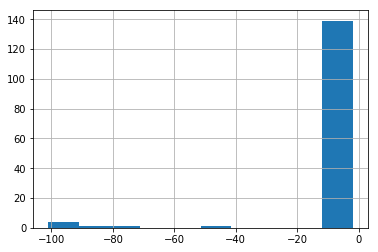

In [95]:
feb_to_date_shipping_db = feb_to_date_db[feb_to_date_db['Transaction Description'].str.contains('Withdrawal from PAYPAL')]

print(feb_to_date_shipping_db['Transaction Amount'].mean())

feb_to_date_shipping_db['Transaction Amount'].hist()

In [101]:
feb_to_date_db['Transaction Description'].value_counts()

Withdrawal from PAYPAL to ANDREW YEN INST XFER                 146
Debit Card Purchase - 48 HR BOOKS 800 2310521 OH                 4
Digital Card Purchase - PAYPAL SHIPSTATION ST 4029357733 TX      2
48 Hour books                                                    1
48 Hour books reprint                                            1
Printing Supplies                                                1
Digital Card Purchase - PAYPAL STICKERAPPI 0763078251 MD         1
Name: Transaction Description, dtype: int64

In [103]:
# total costs (discounting shipping)
feb_to_date_db[~feb_to_date_db['Transaction Description'].str.contains('Withdrawal')]['Transaction Amount'].sum()

-3197.7699999999995

In [6]:
import sys

sys.path

['C:\\Users\\Yanxiang\\OneDrive\\Desktop\\sxratch',
 'C:\\Users\\Yanxiang\\anaconda3\\python38.zip',
 'C:\\Users\\Yanxiang\\anaconda3\\DLLs',
 'C:\\Users\\Yanxiang\\anaconda3\\lib',
 'C:\\Users\\Yanxiang\\anaconda3',
 '',
 'C:\\Users\\Yanxiang\\anaconda3\\lib\\site-packages',
 'C:\\Users\\Yanxiang\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Yanxiang\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Yanxiang\\anaconda3\\lib\\site-packages\\Pythonwin']

In [8]:
# analyze average sale

sales_csv = pd.read_csv('temp_data/Storenvy-the-rookery-press-All-Orders-March-27-2023.csv', encoding='ISO-8859-1')
sales_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order #               277 non-null    int64  
 1   Date                  277 non-null    object 
 2   Product Name          277 non-null    object 
 3   Product Quantity      277 non-null    int64  
 4   Variant Name          277 non-null    object 
 5   Variant SKU           0 non-null      float64
 6   Product Price         277 non-null    object 
 7   Product Discount      277 non-null    object 
 8   Subtotal              200 non-null    object 
 9   Shipping              200 non-null    object 
 10  Tax                   200 non-null    object 
 11  Total                 200 non-null    object 
 12  Handling Fee          200 non-null    object 
 13  Commission Fee        200 non-null    object 
 14  Shipping Class        277 non-null    object 
 15  Shipping Status       2

In [9]:
sales_csv.head()

,Order #,Date,Product Name,Product Quantity,Variant Name,Variant SKU,Product Price,Product Discount,Subtotal,Shipping,...,Last Name,Address 1,Address 2,City,Locale,Locale Abbreviation,Postal Code,Country,Country ISO,Customer Note
0,21454456,02/08/2023 2:44:34 PM,"Collected Works of the Black Liberation Army, ...",1,PRE-ORDER BONUS,NaN,$17.00,$0.00,$17.00,$5.00,...,Kizito,4124 12th Avenue South,55407,Minneapolis,Minnesota,MN,55407,United States,US,NaN
1,21454532,02/08/2023 5:37:11 PM,"The Power of the People is the Force of Life, ...",1,Standard,NaN,$10.00,$0.00,$27.00,$5.00,...,Breidford,3035 Sherman AVE NW,NaN,Washington,District of Columbia,DC,20001,United States,US,always grateful for the work y'all do
2,21454532,02/08/2023 5:37:11 PM,"Collected Works of the Black Liberation Army, ...",1,PRE-ORDER BONUS,NaN,$17.00,$0.00,NaN,NaN,...,Breidford,3035 Sherman AVE NW,NaN,Washington,District of Columbia,DC,20001,United States,US,always grateful for the work y'all do
3,21454536,02/08/2023 5:55:58 PM,"Collected Works of the Black Liberation Army, ...",1,PRE-ORDER BONUS,NaN,$17.00,$0.00,$17.00,$5.00,...,Mausert-Mooney,"2157 W. Coulter St., 2R",60608,Chicago,Illinois,IL,60608,United States,US,NaN
4,21454545,02/08/2023 6:06:59 PM,"Collected Works of the Black Liberation Army, ...",1,STANDARD,NaN,$20.00,$0.00,$20.00,$5.00,...,Simpson,2341 Hughes Ave.,Unit C,Oakland,California,CA,94601,United States,US,NaN


In [12]:
sales_csv[sales_csv['Product Name'].str.contains('Black Liber')]['Subtotal'].value_counts()

$20.00     102
$30.00      23
$17.00      19
$34.00       8
$44.00       7
$40.00       3
$31.00       2
$48.00       2
$68.00       2
$60.00       2
$54.00       2
$51.00       1
$27.00       1
$58.00       1
$104.00      1
Name: Subtotal, dtype: int64

In [90]:
# 141 units of CWBLA sold (2/8 to 3/1) 
sales_csv['num_date'] = sales_csv['Date'].str[:11].str.replace('/','').astype(int)
sales_csv['num_Total'] = sales_csv['Total'].str.replace('$','').astype(float)

In [92]:
sales_csv[sales_csv['num_date']>2082023]['num_Total'].mean()

33.4246874999999